# NLTK

- In this notebook, we setup and try out some of the basic capabilities of the NLTK module
- The notebook uses a python 3.7 installation on anaconda

## References
I shall link here, all the resources I used while working on this project

1. [The NLTK Book: Updated for Python3 (O'Reily)](https://www.nltk.org/book/) 

## Downloading the book content

In [33]:
import nltk
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [34]:
from nltk.book import *

## Inspecting some books

- `nltk.book` imported a set of standard books for us. These books are stored in variables named textn, where n is a number
- sentn stores the first sentence of textn
- Effectively these objects are super-charged python lists, we shall see some of their methods

In [35]:
text1

<Text: Moby Dick by Herman Melville 1851>

### Concordance function
- Concordance displays the occurences of a word (or rather token) with its context (neighbouring tokens)
- In most languages, words may derive meaning from their contexts, hence nlp requires that the machine understand the context a word is being used in 

In [36]:
moby = text1
sense = text2
moby.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


- Going one step further, the `similar` method displays words that were used in a similar context as the given word
- We can see a comparision here, between how the word 'monstrous' can be used in both positive and negative senses in different texts

In [37]:
moby.similar('monstrous')

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [38]:
sense.similar('monstrous')

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


- The `common_contexts` method takes a list of words as input and displays the contexts which both these words share

In [39]:
sense.common_contexts(['monstrous','very'])

am_glad a_pretty a_lucky is_pretty be_glad


- A dispersion plot shows the occurences of a word in a book on a graph. `text` objects have a method to handle this

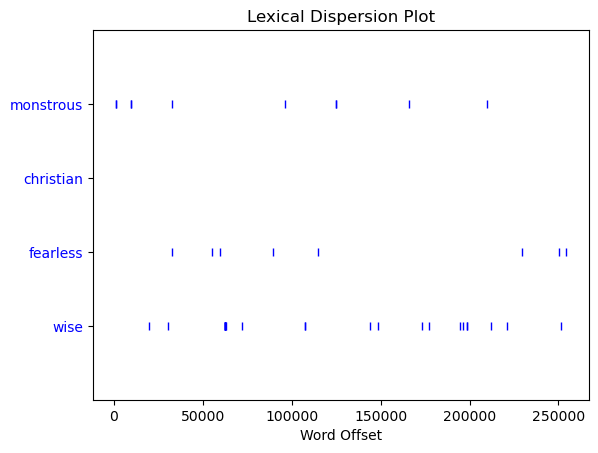

In [40]:
moby.dispersion_plot(['monstrous','christian','fearless','wise'])

- Finally the `generate` method creates some text in the same style as the book. Let's try this on Moby Dick

In [41]:
moby.generate()

long , from one to the top - mast , and no coffin and went out a sea
captain -- this peaking of the whales . , so as to preserve all his
might had in former years abounding with them , they toil with their
lances , strange tales of Southern whaling . at once the bravest
Indians he was , after in vain strove to pierce the profundity . ?"
then ?" a levelled flame of pale , And give no chance , watch him ;
though the line , it is to be gainsaid . he being


'long , from one to the top - mast , and no coffin and went out a sea\ncaptain -- this peaking of the whales . , so as to preserve all his\nmight had in former years abounding with them , they toil with their\nlances , strange tales of Southern whaling . at once the bravest\nIndians he was , after in vain strove to pierce the profundity . ?"\nthen ?" a levelled flame of pale , And give no chance , watch him ;\nthough the line , it is to be gainsaid . he being'

## Quantitatively Analysing Word Use
- The above methods handled qualititative tasks, words, their contexts, their synonyms, etc.
- However a machine naturally understands quantitative numerical information more clearly
- We shall look at two such parameters - lexical diversity and percentage occurence
    1. Lexical Diversity - It is a measure of the richness of the text, defined as the number of unique tokens in the text divided by the number of tokens in the text. 
    2. Percentage Occurence - It is a measure of what percentage of a text comprises of a certain word.

In [52]:
print(f'Number of words: {len(moby)}')
print(f'Number of unique words: {len(set(moby))}')
print(f'Lexical Diversity of Moby Dick: {len(set(moby))/len(moby)}')

Number of words: 260819
Number of unique words: 19317
Lexical Diversity of Moby Dick: 0.07406285585022564


In [44]:
chats = text5
ans = chats.count('lol')
print(f'Percentage of word lol in the text: {ans*100/len(chats)}')

Percentage of word lol in the text: 1.5640968673628082


- Given how useful they are, it is often useful to define helper functions to calculate these parameters directly

In [45]:
def lex_diversity(text):
    return len(set(text))/len(text)

def percentage_word(word, text):
    return 100*text.count(word)/len(text)

### Frequency Distributions
- Now let's look at frequency distributions, how frequently a given token in a text appears
- Token is any sequence of characters that is considered a group, a comma, 'hi', 'whale' all are examples of tokens
- `FreqDist()` takes a text as input and creates an object with the frequency distribution information of the text
- The `most_common(n)` method can display the freuqency of the n most common words
- The `plot` method can plot this data onto graphs using matplotlib

In [47]:
fdist1 = FreqDist(moby)
print(fdist1)
print(fdist1.most_common(50))

<FreqDist with 19317 samples and 260819 outcomes>
[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632), ('as', 1620), ('"', 1478), ('all', 1462), ('for', 1414), ('this', 1280), ('!', 1269), ('at', 1231), ('by', 1137), ('but', 1113), ('not', 1103), ('--', 1070), ('him', 1058), ('from', 1052), ('be', 1030), ('on', 1005), ('so', 918), ('whale', 906), ('one', 889), ('you', 841), ('had', 767), ('have', 760), ('there', 715), ('But', 705), ('or', 697), ('were', 680), ('now', 646), ('which', 640), ('?', 637), ('me', 627), ('like', 624)]


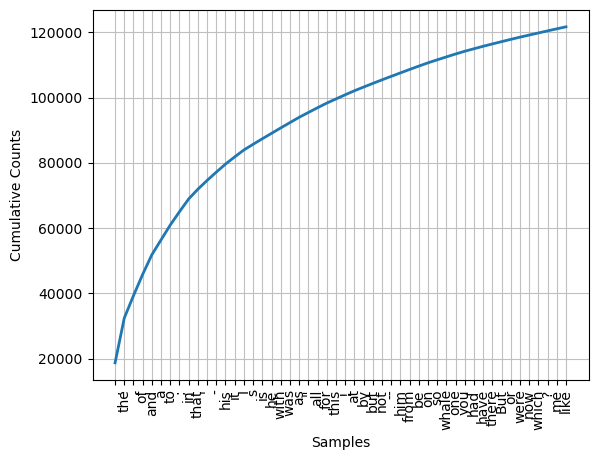

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [48]:
fdist1.plot(50,cumulative=True)

- Most of the information above is clearly useless. Words like 'the', 'and' or punctuation don't really tell us anything about the book. So let's try doing the opposite and seeing words that occur very unfrequently - hapaxes

In [49]:
fdist1.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


- Unfortunately even these don't give us a lot of information yet
- Now let's expand on our ideas of context a bit more, some words are used in particularly contexts very frequently. Two word pairs like this are called collocations, for example red wine, or say Moby Dick.

In [50]:
moby.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


### Word Length Analysis
- Let's look at one more useful analysis point, the length of the word
- Intuition tells us that the author, period, and the genre of the book should all influence things like the average length of the word in the book
- We can demonstrate the versatility of some nltk functions using this - reusing the `FreqDist` function here

In [53]:
word_len_dist = FreqDist(len(word) for word in moby)

In [54]:
word_len_dist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

## Some Theory

### Word Sense Disambiguation
- We already saw that words acquire different meanings from their context, and the goal of word sense disambiguation is to figure out what sense of a word was used in a given usage of the word, see for example, the usage of *by* in these 3 sentences - 
    - The lost children were found by the searchers (Agent)
    - The lost children were found by the mountain (Location)
    - The lost children were found by the afternoon (Time)

### Pronoun Resolution
- You can already guess where this is heading, pronouns are features of the language which abstract out details about the subject and object in favour of reducing redundancy. Consider these statements, and figure out what *they* refers to - 
    - The thieves stole the paintings. They were subsequently sold.
    - The thieves stole the paintings. They were subsequently caught.
    - The thieves stole the paintings. They were subsequently found.


### Machine Translation
- This is arguably the most active field of language understanding, the goal being to have a perfect translator between languages
- It's easy to get lost in translation, just try to translate a sentence between two languages on any translator online continuously, until all meaning is lost
- The core problem is simply that words take different meanings in different contexts, and are placed differently in different languages

### Spoken Dialog Systems
- The Turing System is a very popular concept in the field of artificial intelligence, the argument being that the perfect artifical intelligence should be able to hold a conversation with a human without the human figuring out that the system is an AI
- How practical is this test though? The most popular example of a spoken dialog system are the automated phone answering systems
- They are extremely practical and very effective, but work in very specialised situations. For example, a gas cylinder booking system cannot really talk about the weather, or theatre screenings
- However the system does understand the goal of the user and does have some understanding of contexts
- The Google Assistant is an excellent example of a very versatile Spoken Dialog System
- NLTK comes with a few different chatbots included - `nltk.char.chatbots()` provides a list of them

### Textual Entailment
- This is a recent big problem of the nlp field. The task is to find whether a given text proves a given hypothesis.
- Consider for example, 
    - Text: David Golinkin is the editor or author of eighteen books, and over 150 responsa, articles, sermons and books
    - Hypothesis: Golinkin has written eighteen books
- Answering this question needs some prerequisite knowledge, for example, the meaning of editor and author in relation to writing a book


***
# Exercises from The NLTK Book

> ### Q5 Compare the lexical diversity for humour and romance fiction. 

In [64]:
from nltk.corpus import brown
romance = brown.words(categories='romance')
humor = brown.words(categories='humor')
print(f'Romance: {lex_diversity(romance)}, Humour: {lex_diversity(humor)}')


Romance: 0.12070492131044529, Humour: 0.23125144042406084


> ### Q15 Review the discussion of conditionals in 4. Find all words in the Chat Corpus (text5) starting with the letter b. Show them in alphabetical order.

In [72]:
words = [word for word in set(text5) if (word.isalpha() and word[0] in 'bB')]
words.sort()
print(words)

['B', 'BAAAAALLLLLLLLIIIIIIINNNNNNNNNNN', 'BE', 'BIG', 'BLONDES', 'BOOTS', 'BOOTY', 'BOY', 'BUT', 'BUt', 'BYE', 'Back', 'Barbieee', 'Barometer', 'Beach', 'Because', 'Been', 'Ben', 'Benjamin', 'Better', 'Bible', 'Biiiiiitch', 'Biographys', 'Birdgang', 'Bloooooooood', 'Bloooooooooood', 'Bloooooooooooood', 'Bone', 'Bonus', 'Books', 'Boone', 'Booyah', 'Borat', 'Born', 'Box', 'Boyz', 'Break', 'Breaking', 'Broken', 'Bud', 'Burger', 'But', 'Bwhaha', 'Bye', 'b', 'babay', 'babble', 'babblein', 'babe', 'babes', 'babi', 'babies', 'babiess', 'baby', 'babycakeses', 'bachelorette', 'back', 'backatchya', 'backfrontsidewaysandallaroundtheworld', 'backroom', 'backup', 'bacl', 'bad', 'bag', 'bagel', 'bagels', 'bahahahaa', 'bak', 'baked', 'balad', 'balance', 'balck', 'ball', 'ballin', 'balls', 'ban', 'band', 'bandito', 'bandsaw', 'banjoes', 'banned', 'baord', 'bar', 'barbie', 'bare', 'barely', 'bares', 'barfights', 'barks', 'barn', 'barrel', 'base', 'bases', 'basically', 'basket', 'battery', 'bay', 'bbbb

> ###  Q22 Find all the four-letter words in the Chat Corpus (text5). With the help of a frequency distribution (FreqDist), show these words in decreasing order of frequency.

In [97]:
reqd_words = [word for word in text5 if (word.isalpha() and len(word)==4)]
fdist = FreqDist(reqd_words)
unique = list(set(reqd_words))
unique.sort(key=fdist.freq,reverse=True)
print(unique)

['JOIN', 'PART', 'that', 'what', 'here', 'have', 'like', 'with', 'chat', 'your', 'good', 'just', 'lmao', 'know', 'room', 'from', 'this', 'well', 'hiya', 'back', 'they', 'yeah', 'dont', 'want', 'love', 'guys', 'some', 'been', 'talk', 'nice', 'time', 'when', 'make', 'haha', 'need', 'girl', 'MODE', 'much', 'will', 'then', 'over', 'were', 'work', 'take', 'song', 'even', 'seen', 'does', 'damn', 'more', 'only', 'come', 'hell', 'long', 'them', 'tell', 'name', 'away', 'sure', 'call', 'look', 'baby', 'play', 'down', 'NICK', 'cool', 'many', 'sexy', 'hate', 'said', 'last', 'ever', 'life', 'hear', 'live', 'same', 'stop', 'mean', 'give', 'must', 'LMAO', 'very', 'feel', 'What', 'find', 'cant', 'hugs', 'lost', 'hair', 'nite', 'left', 'shit', 'busy', 'fine', 'game', 'real', 'kill', 'sits', 'eyes', 'lets', 'heya', 'fuck', 'wait', 'shut', 'read', 'true', 'goes', 'keep', 'near', 'else', 'nope', 'free', 'pick', 'gets', 'cold', 'awww', 'used', 'male', 'than', 'hope', 'head', 'told', 'stay', 'hehe', 'This',